### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Submission File Format
The file should contain a header and have the following format:
```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```
You can download an example submission file (sample_submission.csv) on the Data page.

In [1]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing_file_path = './home-data-for-ml-course/train.csv'

# read the data with the index column being 1st column
housing_data = pd.read_csv(housing_file_path, index_col=0)

housing_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

- We can see that there are missing values on `LotFrontage` column.
- The data is also not up to date as there are only houses up to year 2010.

## Selecting The Prediction Target

You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [3]:
y = housing_data.SalePrice

Numerical columns within the dataset

In [4]:
housing_data.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
print(len(housing_data.select_dtypes(exclude=['object']).columns))

37


There are 37 numerical columns, including target, SalePrice

- Some potential anomalies in certain rows of the dataset may cause the column data type to become an 'object'. This may lead to an error in distinguishing between numerical and categorical columns. How can this be checked efficiently?

- It is possible that there are numerical columns that have data in the form of discrete, and limited number of values. Such columns may also be interpreted as categorical data. 

The 37 numerical columns have the following general characteristics:



In [6]:
housing_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


Categorical columns within the dataset

In [7]:
housing_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
len(housing_data.select_dtypes(include='object').columns)


43

In [9]:
housing_data.select_dtypes(include=['object']).describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Exploring housing data

### Skew of target column
It appears to be good practice to minimise the skew of the dataset. The reason often given is that skewed data adversely affects the prediction accuracy of regression models. 
Note: While important for linear regression, correcting skew is not necessary for Decisions Trees and Random Forests.

/Users/chingnow/anaconda3/envs/kaggle-titanic/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


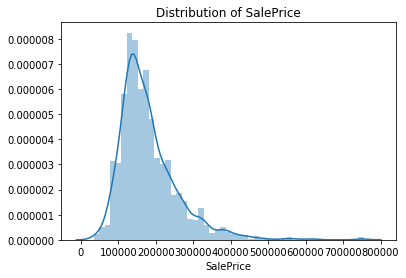

In [10]:
target = housing_data.SalePrice
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

/Users/chingnow/anaconda3/envs/kaggle-titanic/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


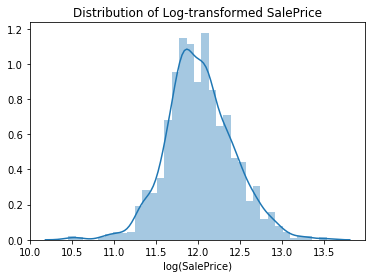

In [11]:
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [12]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


Notes for Data Cleaning & Preprocessing:

- Perform log transformation on SalePrice
- Feature variables that are skewed should also be investigated to assess whether they require transformation

Distributions of attributes

/Users/chingnow/anaconda3/envs/kaggle-titanic/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


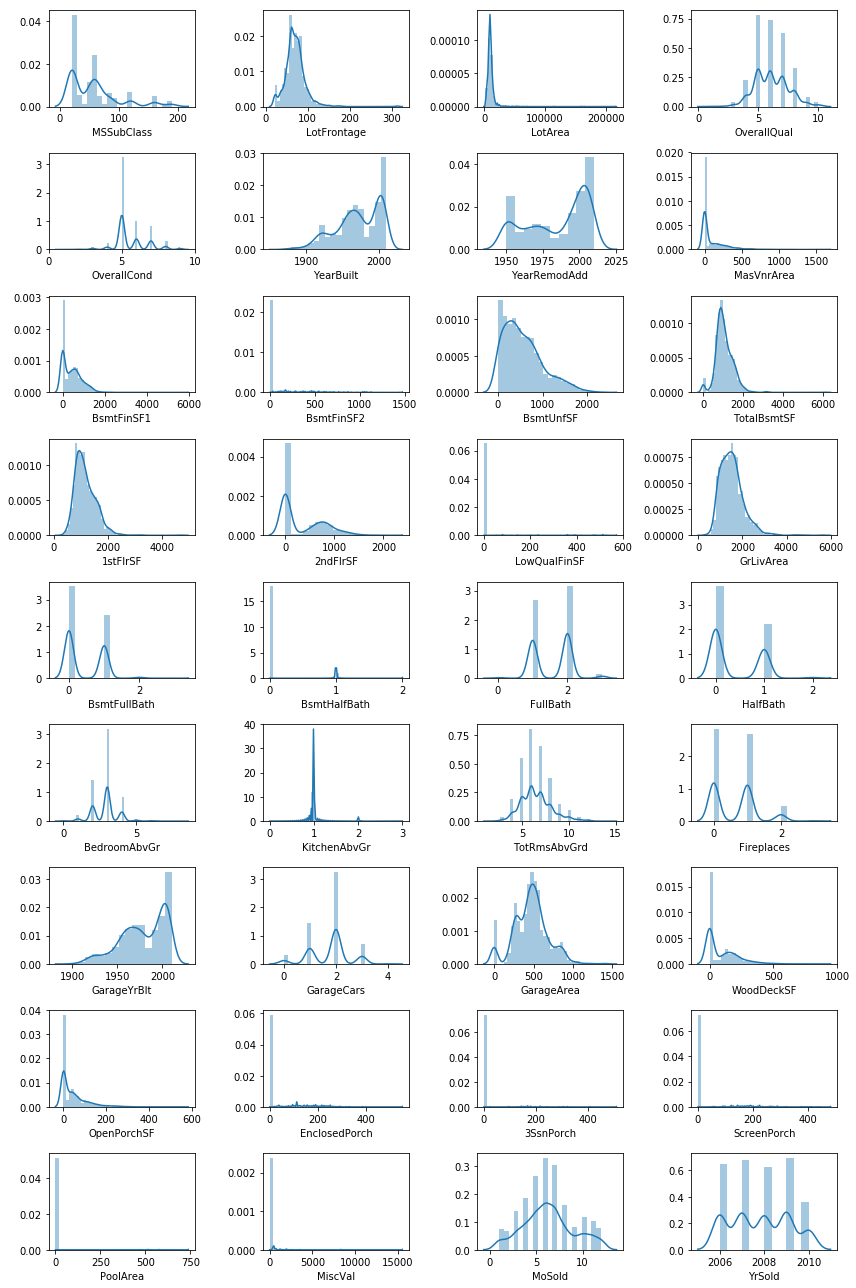

In [13]:
# only for numerical attributes
num_attributes = housing_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

Notes for Data Cleaning & Preprocessing: 

Uni-modal, skewed distributions could potentially be log transformed: 

```LotFrontage, LotArea, 1stFlrSF, GrLivArea, OpenPorchSF```

After-note: This will be a future addition.

Finding Outliers

Visualisation of data may support the discovery of possible outliers within the data. Examples of how this can be done include:

1. Within univariate analysis, for example through using box plots. Outliers are observations more than a multiple (1.5-3) of the IQR (inter-quartile range) beyond the upper or lower quartile. (If data is skewed, it may be helpful to transform them first to a more symmetric distribution shape)

2. Within bivariate analysis, for example scatterplots. Outliers have y-values that are unusual in relation to other observations with similar x-values. Alternatively, plots of the residuals from fitted least square line of bivariate regression can also indicate outliers.

The consensus is that all outliers should be carefully examined:

- Go back to original data to check for recording or transcription errors
- If no such errors, look carefully for unusual features of the individual unit to explain difference. This may lead to new theory/discoveries
- If data cannot be checked further, outlier is usually (often) dropped from the dataset.

The scatterplots of SalePrice against each numerical attribute is shown below, with the aim of employing method 2 above with bivariate analysis.

**Univariate analysis - box plots for numerical attributes**

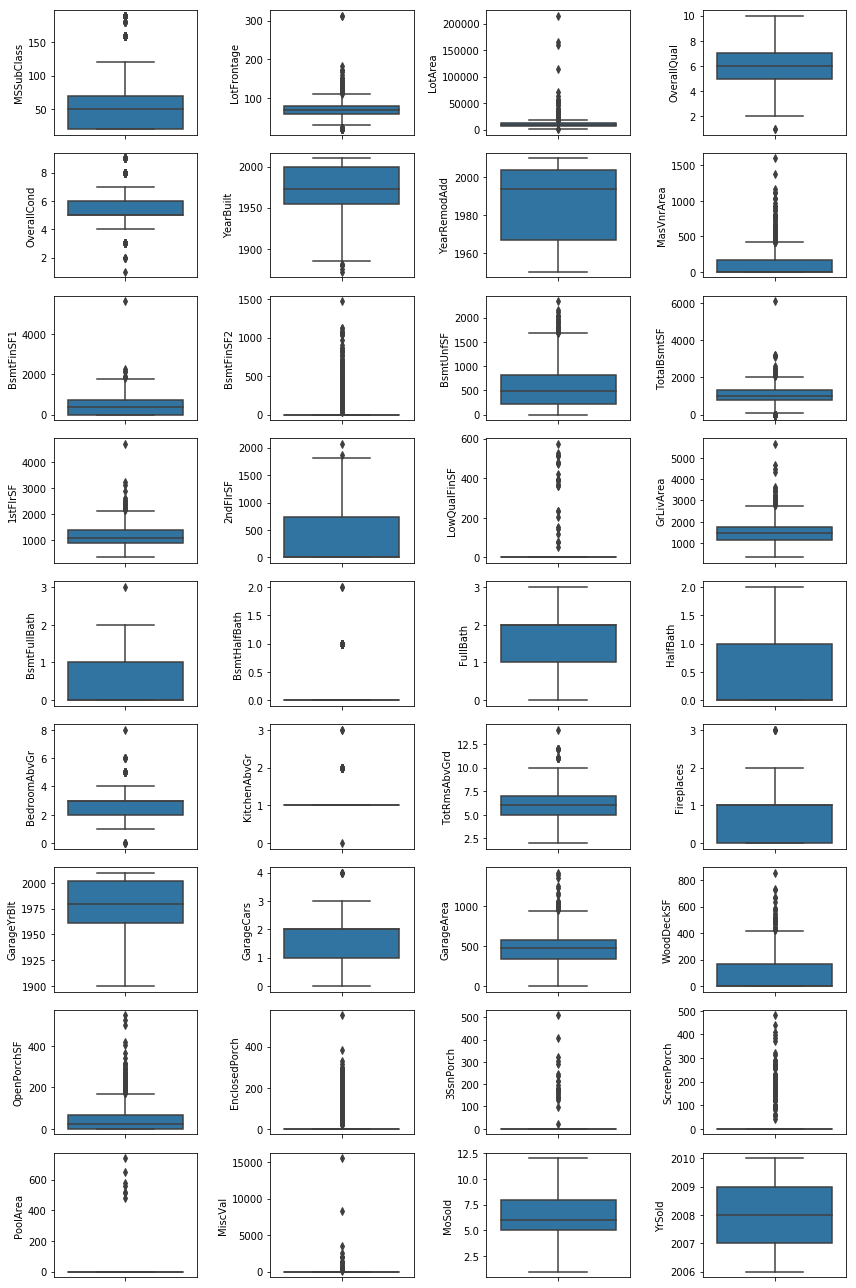

In [14]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

**Bivariate analysis - scatter plots for target versus numerical attributes**

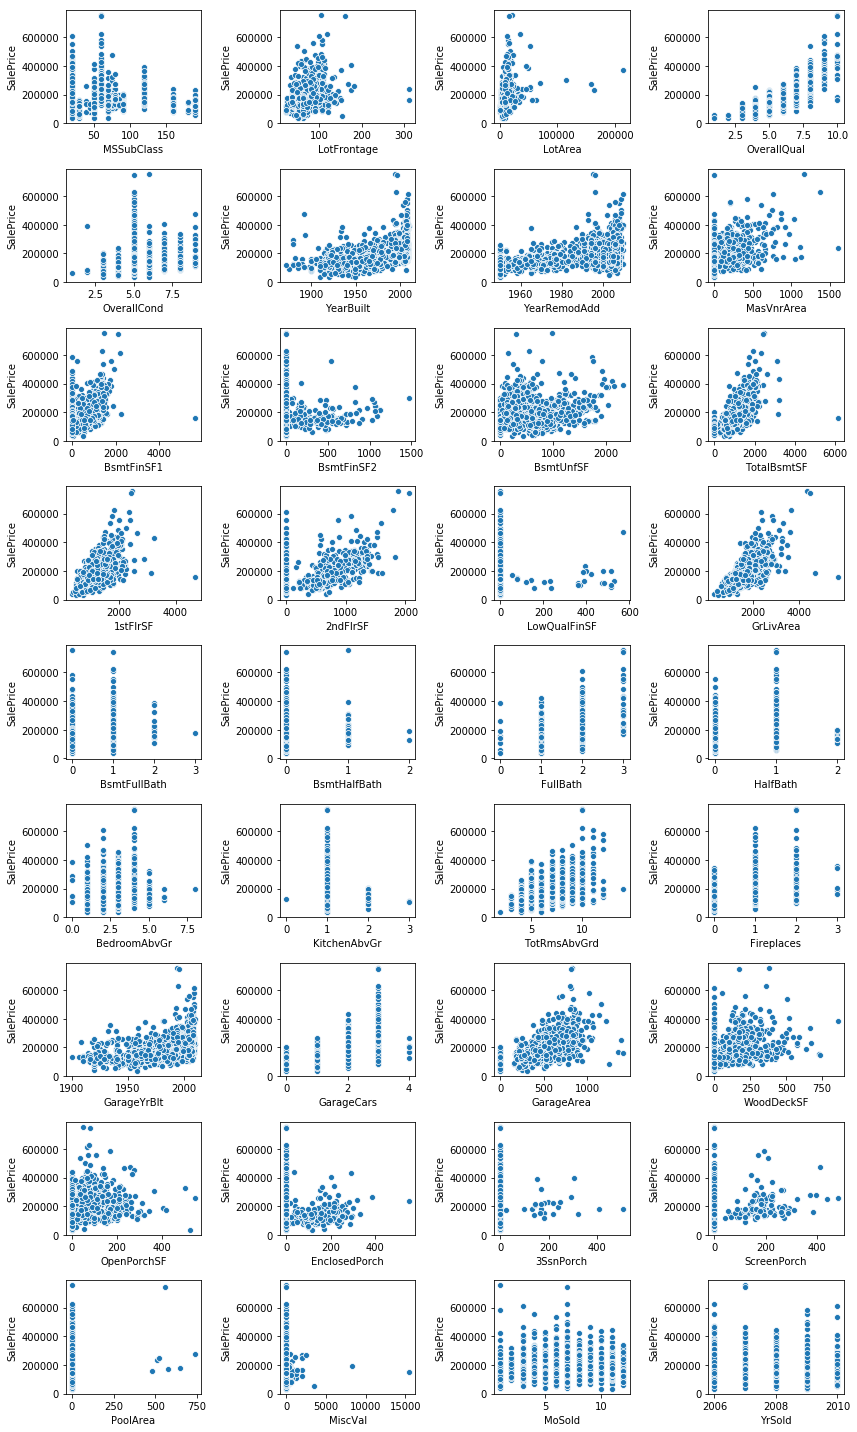

In [15]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

**Notes for Data Cleaning & Preprocessing**

Based on a first viewing of the scatter plots against SalePrice, there appears to be:

- A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
- BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
- 1stFlrSF (>4000)
- GrLivArea (>4000 AND SalePrice <300000)
- LowQualFinSF (>550) 

**Assess correlations amongst attributes**

The linear correlation between two columns of data is shown below. There are various correlation calculation methods, but the Pearson correlation is often used and is the default method. It may be useful to note that:

1. A combination of the correlation figure and a scatter plot can support the understanding of whether there is a non-linear correlation (i.e. depending on the data, this may result in a low value of linear correlation, but the variables may still be strongly correlated in a non-linear fashion)
2. Correlation values may be heavily influenced by single outliers! 

Several authors have suggested that "to use linear regression for modelling, it is necessary to remove correlated variables to improve your model", and "it's a good practice to remove correlated variables during feature selection"


Below is a heatmap of the correlation of the numerical columns:

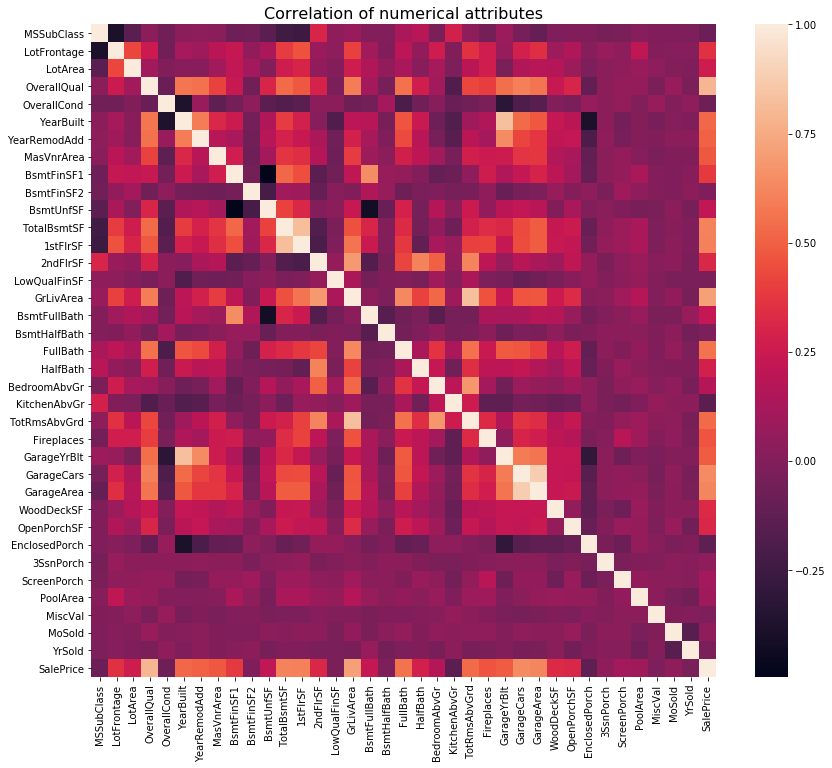

In [16]:
correlation = housing_data.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

## Heatmap with annotation of correlation values
# sns.heatmap(home_data.corr(), annot=True)

With reference to the target SalePrice, the top correlated attributes are:

In [17]:
correlation['SalePrice'].sort_values(ascending=False).head(15)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Show scatter plots for each numerical attribute (again, but different, less-efficient code) and show correlation value:

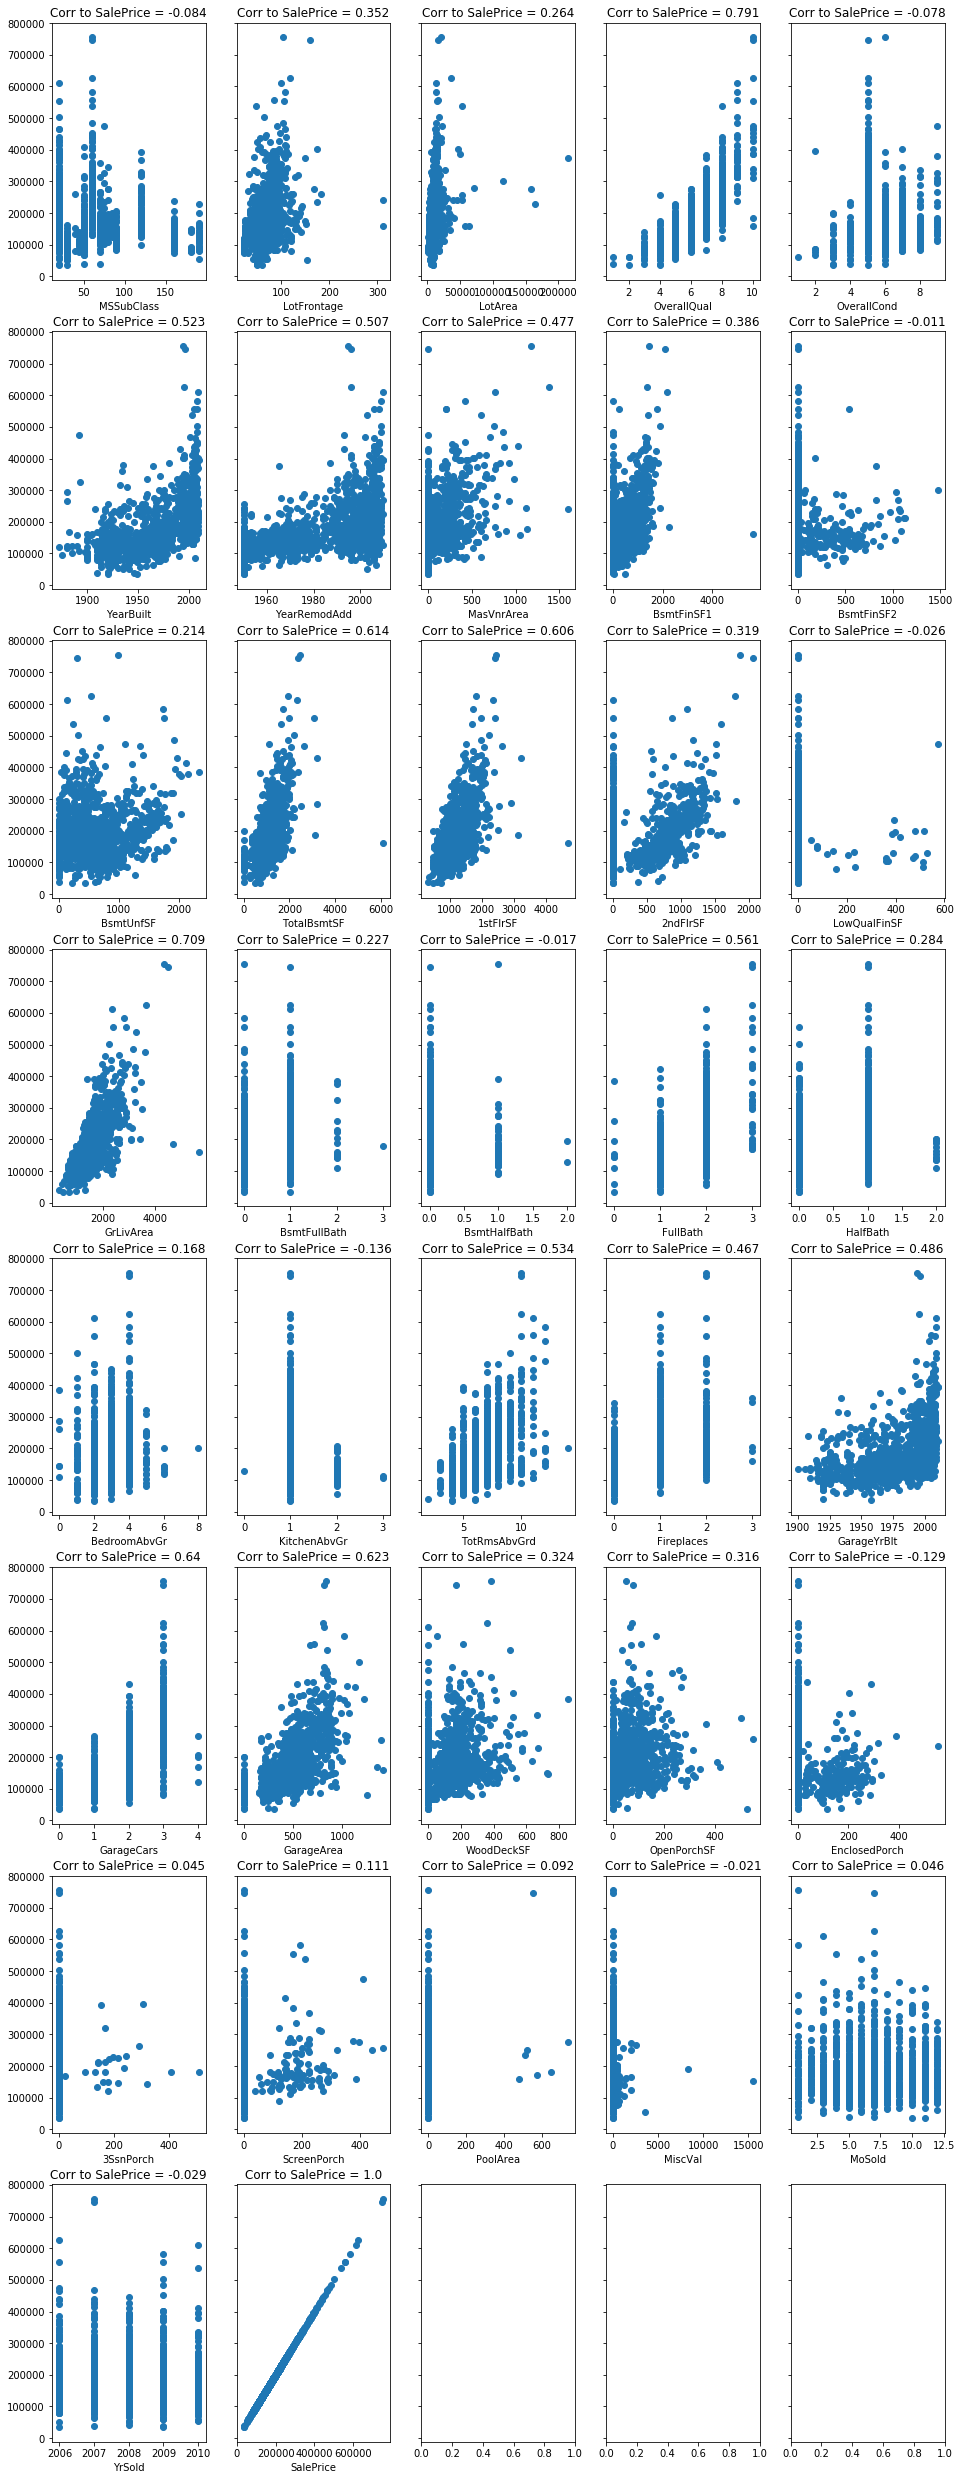

In [18]:
num_columns = housing_data.select_dtypes(exclude='object').columns
corr_to_price = correlation['SalePrice']
n_cols = 5
n_rows = 8
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(housing_data[num_columns[index]], housing_data.SalePrice)
            plt.xlabel(num_columns[index])
            plt.title('Corr to SalePrice = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()

**Notes for Feature Selection & Engineering:** Based on the scatter plots and correlation figures above, consider:

- Excluding GarageArea - highly (0.88) correlated with GarageCars, which has a higher corr with Price
- Excluding GarageYrBlt - highly (0.83) correlated with YearBuilt
- Excluding all attributes with low corr with Price and unclear non-linear correlation - e.g. MSSubClass, MoSold, YrSold, MiscVal, BsmtFinSF2, BsmtUnfSF, LowQualFinSF?

#### Missing/null values in numerical columns


In [19]:
# Show columns with most null values:
num_attributes.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

**Notes for Data Cleaning & Processing:**

- Not yet clear what to do with LotFrontage missing values. Simple imputation with median? LotFrontage correlation with Neigborhood?
- GarageYrBlt is highly correlated with YearBuilt, and as an after-note, it is discarded before the machine learning step. Hence no action required.
- MasVnrArea has 8 missing values, the same number as missing MasVnrType values. Likely not to have masonry veneer. Hence, fill with 0

### Exploring categorical columns

Examples of box plots of SalePrice versus categorical values¶


In [20]:
cat_columns = housing_data.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


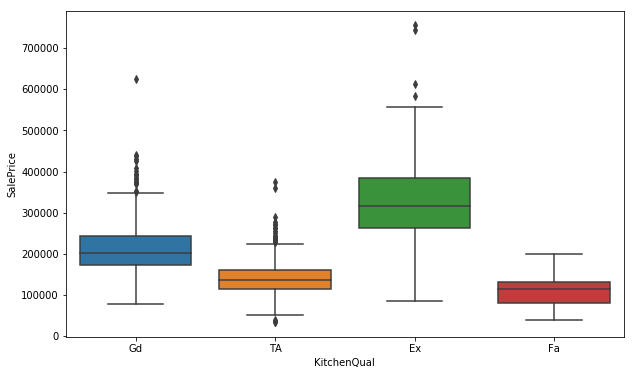

In [21]:
var = housing_data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing_data.SalePrice, x=var)
plt.show()

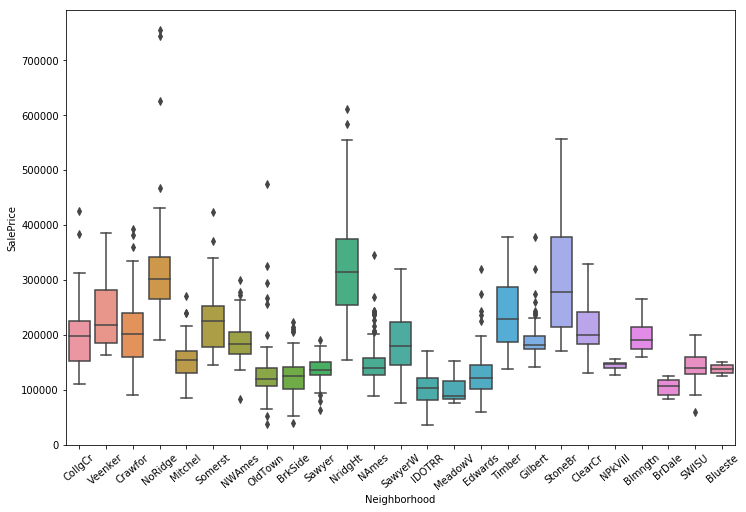

In [22]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=housing_data.SalePrice, x=housing_data.Neighborhood)
plt.xticks(rotation=40)
plt.show()

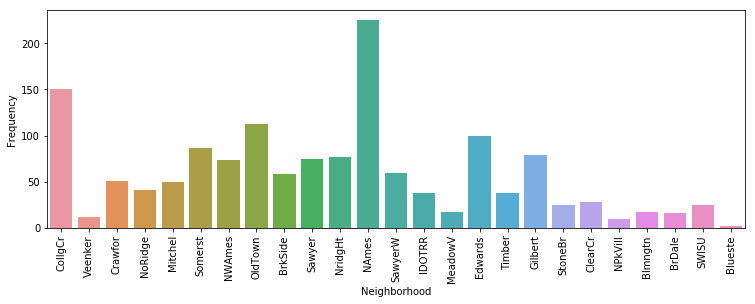

In [23]:
## Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=housing_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

#### Missing/null values in categorical columns

In [24]:
housing_data[cat_columns].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

**Notes for Data Cleaning & Preprocessing:**

- For the moment, assume that PoolQC to Bsmt attributes are missing as the houses do not have them (pools, basements, etc.). Hence, the missing values could be filled in with "None".
- MasVnrType has 8 missing values, the same number as missing MasVnrArea values. Likely not to have masonry veneer. Hence, fill with 'None'

## Data Cleaning & Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Dealing with missing/null values

In [26]:
# Create copy of dataset  ====================================
home_data_copy = housing_data.copy()

# Dealing with missing/null values ===========================
# Numerical columns:
home_data_copy.MasVnrArea = home_data_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    home_data_copy[cat] = home_data_copy[cat].fillna("None")
    

In [27]:
# Check for outstanding missing/null values
# Scikit-learn's Imputer will be used to address these
home_data_copy.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
Electrical       1
SalePrice        0
Foundation       0
dtype: int64

### Addressing outliers

In [28]:
# Remove outliers based on observations on scatter plots against SalePrice:
home_data_copy = home_data_copy.drop(home_data_copy['LotFrontage']
                                     [home_data_copy['LotFrontage']>200].index)
home_data_copy = home_data_copy.drop(home_data_copy['LotArea']
                                     [home_data_copy['LotArea']>100000].index)
home_data_copy = home_data_copy.drop(home_data_copy['BsmtFinSF1']
                                     [home_data_copy['BsmtFinSF1']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy['TotalBsmtSF']
                                     [home_data_copy['TotalBsmtSF']>6000].index)
home_data_copy = home_data_copy.drop(home_data_copy['1stFlrSF']
                                     [home_data_copy['1stFlrSF']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy.GrLivArea
                                     [(home_data_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
home_data_copy = home_data_copy.drop(home_data_copy.LowQualFinSF
                                     [home_data_copy['LowQualFinSF']>550].index)

### Transforming data to reduce skew

In [29]:
home_data_copy['SalePrice'] = np.log(home_data_copy['SalePrice'])
home_data_copy = home_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

## Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

Considering highly-correlated features
Feeding highly-correlated features to machine algorithms may cause a reduction in performance. Hence, these are addressed below:

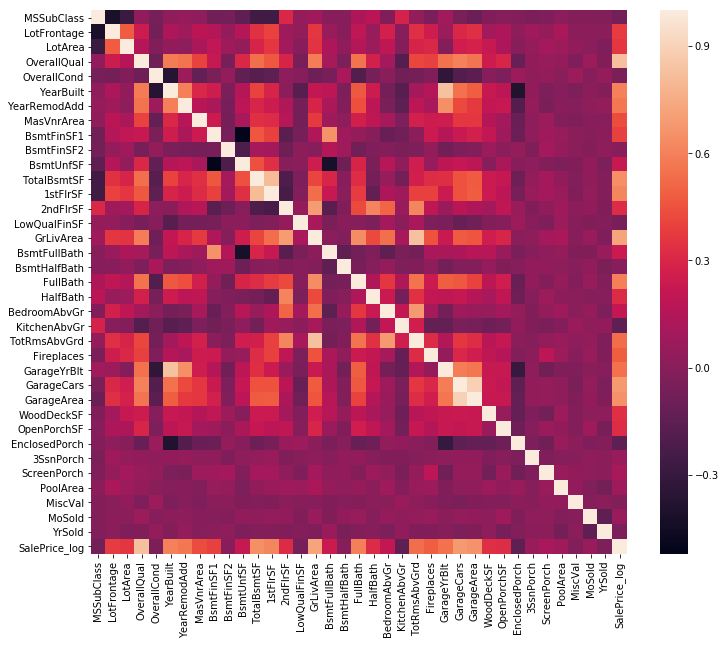

In [30]:
transformed_corr = home_data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

Highly-correlated attributes include (left attribute has higher correlation with SalePrice_log):

- GarageCars and GarageArea (0.882)
- YearBuilt and GarageYrBlt (0.826)
- GrLivArea_log1p and TotRmsAbvGrd (0.826)
- TotalBsmtSF and 1stFlrSF_log1p (0.780)

Perhaps choose to drop the column with the lower correlation against SalePrice_log from the above pairs with more than 0.8 correlation.

#### Perform feature selection, and encoding of categorical columns

In [31]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes

X = home_data_copy.drop(attributes_drop, axis=1)

# Create target object and call it y
y = home_data_copy.SalePrice_log

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normalisation - to be added later
# normaliser = StandardScaler()
# train_X = normaliser.fit_transform(train_X)
# val_X = normaliser.transform(val_X)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

## Preliminary Assessment of Machine Learning Algorithms

Import machine learning modules

In [32]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

**Reminder: target is now log(SalePrice). After prediction call, need to inverse-transform to obtain SalePrice!**

In [33]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

In [34]:
# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

In [35]:
# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))

mae_compare['RandomForest'] = rf_val_mae
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


/Users/chingnow/anaconda3/envs/kaggle-titanic/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation MAE for Random Forest Model: 17,134


In [36]:
# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))

mae_compare['LinearRegression'] = linear_val_mae
print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

Validation MAE for Linear Regression Model: 14,419


In [37]:
# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

mae_compare['Lasso'] = lasso_val_mae
print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

Validation MAE for Lasso Model: 13,687


In [38]:
# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))

mae_compare['Ridge'] = ridge_val_mae
print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

Validation MAE for Ridge Regression Model: 14,272


In [39]:
# ElasticNet ===========================================================
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))

mae_compare['ElasticNet'] = elastic_net_val_mae
print("Validation MAE for Elastic Net Model: {:,.0f}".format(elastic_net_val_mae))


Validation MAE for Elastic Net Model: 16,743


In [40]:
# Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

mae_compare['GradientBoosting'] = gbr_val_mae
print("Validation MAE for Gradient Boosting Model: {:,.0f}".format(gbr_val_mae))

Validation MAE for Gradient Boosting Model: 14,716


In [41]:
print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

MAE values for different algorithms:


Algorithm
Lasso               13687.0
Ridge               14272.0
LinearRegression    14419.0
GradientBoosting    14716.0
ElasticNet          16743.0
RandomForest        17134.0
dtype: float64

##### Cross-validation
Use scikit-learn's cross_val_score to try k-fold cross-validation

In [42]:
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

# =========================================================================
scores = cross_val_score(lasso_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.016


In [43]:
scores = cross_val_score(gbr_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = np.sqrt(-scores)

print('For Gradient Boosting model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

For Gradient Boosting model:
Mean RMSE = 0.119
Error std deviation = 0.018


In [44]:
scores = cross_val_score(rf_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Random Forest model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For Random Forest model:
Mean RMSE = 0.142
Error std deviation = 0.018


### Selection of Best Algorithm(s) & Fine-Tuning
Create a Model and Make Predictions for the Competition

Read the file of "test" data. And apply best model to make predictions

Reminders:

- Need to perform all transformations and normalisation, etc. to test data similar to when training the data
- Make sure to inverse transform predictions to get predicted SalePrice

Use scikit-learn's function to grid search for the best combination of hyperparameters¶

In [46]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Tuning Lasso
param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()

# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_

{'alpha': 0.0005}

In [47]:
# path to file you will use for predictions
test_data_path = './home-data-for-ml-course/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

Repeat pre-processing defined previously

In [48]:
# create test_X which to perform all previous pre-processing on
test_X = test_data.copy()

# Repeat treatments for missing/null values =====================================
# Numerical columns:
test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)

# Categorical columns:
for cat in cat_cols_fill_none:
    test_X[cat] = test_X[cat].fillna("None")

# Repeat dropping of chosen attributes ==========================================
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')

test_X = test_data.drop(attributes_drop, axis=1)

# One-hot encoding for categorical data =========================================
test_X = pd.get_dummies(test_X)


# ===============================================================================
# Ensure test data is encoded in the same manner as training data with align command
final_train, final_test = X.align(test_X, join='left', axis=1)

# Imputer for all other missing values in test data. Note: Do not 'fit_transform'
final_test_imputed = my_imputer.transform(final_test)

Create final model

In [49]:
# Create model - on full set of data (training & validation)
# Best model = Lasso?
final_model = Lasso(alpha=0.0005, random_state=5)
# final_model = XGBRegressor(n_estimators=1500, learning_rate=0.03)
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model using all the data - train it on all of X and y
final_model.fit(final_train_imputed, y)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=5,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
# make predictions which we will submit. 
test_preds = final_model.predict(final_test_imputed)

# The lines below shows you how to save your data in the format needed to score it in the competition
# Reminder: predictions are in log(SalePrice). Need to inverse-transform.
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': inv_y(test_preds)})

output.to_csv('submission.csv', index=False)

### Future Study
Exploratory Data Analysis

- How to assess outliers for categorical columns?
- How to check for correlation amongst categorical columns?

Data Cleaning & Preprocessing

- Add code to perform data normalisation/standardisation.
- Create custom scikit-learn preprocessing class so that this can be easily used later with pipelines.
- Consider scikit-learn's PowerTransformer preprocessing module to fit and transform columns to be more Gaussian-like.

Feature Selection & Engineering

- Think about possible combination of attributes to create useful new features, including polynomials.
- Explore pros and cons of other methods to encode categorical attributes, besides one-hot encoding
- Consider further advanced preprocessing techniques, such as Principal Components Analysis for dimensionality reduction, to create new features

Preliminary Assessment of ML Algorithms

- Use scikit-learn's pipelines!
- Learn how best to utilise ensemble methods.
- Explore choices for performance criteria.
- Plots to diagnose bias vs. variance, and learning curves

Selection of Best Algorithm(s) & Fine-tuning

- Test newly engineered features as hyperparameters in grid-search cross-validation.
Partial-dependence plots for understanding the final model better.
